<a href="https://colab.research.google.com/github/fagonzalezo/qmc/blob/master/examples/qmkregressing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install qmc if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc qmc1
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

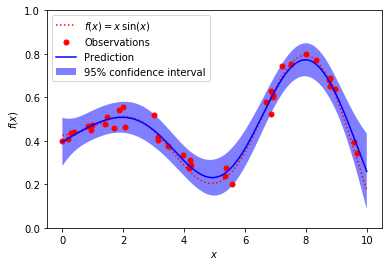

(1000, 1)


In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as pl

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

x = np.atleast_2d(np.linspace(0, 10, 1000)).T

#X = np.linspace(0.1, 9.9, 20)
X = 10* np.random.random(40)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape[0])
noise = np.random.normal(0, dy)
y += noise
scaler = MinMaxScaler((0.2, 0.8))
y = scaler.fit_transform(y.reshape(-1, 1)).ravel()

# Instantiate a Gaussian Process model
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha= 0.01,# dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, scaler.transform(f(x)), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X.ravel(), y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill_between(x[:,0], y_pred - 1.9600 * sigma, y_pred + 1.9600 * sigma,
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0, 1)
plt.legend(loc='upper left')

plt.show()
print(x.shape)

In [3]:
import qmc.tf.layers as layers
import qmc.tf.models as models
import tensorflow as tf



2/2 [==============================] - 0s 2ms/step


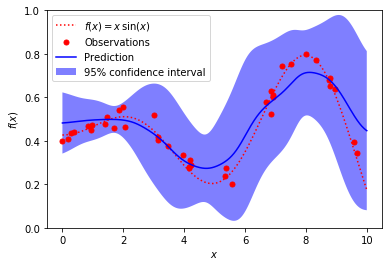

(1000, 1)


In [26]:
X = X.reshape((-1, 1))
dim_x = 100
dim_y = 5
fm_x = layers.QFeatureMapRFF(1, dim=dim_x, gamma=1, random_state=1)
fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=120)
qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
qmr.compile()
y1 = y.reshape(-1, 1)
qmr.fit(X, y1, epochs=1)
#out = qmr.predict(x.reshape((-1, 1)))

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
out = qmr.predict(x.reshape((-1, 1)))
y_pred, sigma = out[:, 0], np.sqrt(out[:, 1])
plt.figure()
plt.plot(x, scaler.transform(f(x)), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X.ravel(), y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill_between(x[:,0], y_pred - 1.9600 * sigma, y_pred + 1.9600 * sigma,
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0, 1)
plt.legend(loc='upper left')

plt.show()
print(x.shape)

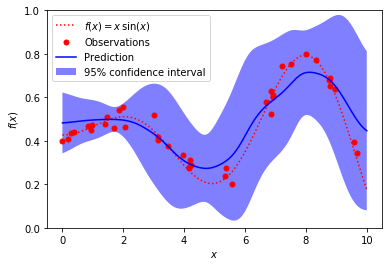

(1000, 1)


In [27]:
qmr1 = models.QMRegressorSGD(input_dim=1, dim_x=dim_x, num_eig=15, dim_y=dim_y, gamma=1, random_state=1)
eig_vals = qmr1.set_rho(qmr.get_rho())

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
out = qmr1.predict(x.reshape((-1, 1)))
y_pred, sigma = out[:, 0], np.sqrt(out[:, 1])
plt.figure()
plt.plot(x, scaler.transform(f(x)), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X.ravel(), y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill_between(x[:,0], y_pred - 1.9600 * sigma, y_pred + 1.9600 * sigma,
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0, 1)
plt.legend(loc='upper left')

plt.show()
print(x.shape)

<tf.Tensor: shape=(), dtype=float32, numpy=1.000001>

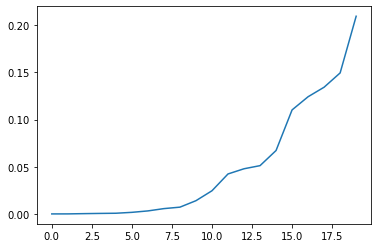

In [96]:
import tensorflow as tf
pl.plot(eig_vals[-20:])
tf.reduce_sum(eig_vals)

Epoch 1/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0039
Epoch 2/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0024
Epoch 3/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0019
Epoch 4/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0018
Epoch 5/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0019
Epoch 6/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0017
Epoch 7/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0016
Epoch 8/20
2/2 [==============================] - 0s 67ms/step - loss: 0.0016
Epoch 9/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0015
Epoch 10/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0015
Epoch 11/20
2/2 [==============================] - 0s 69ms/step - loss: 0.0015
Epoch 12/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0015
Epoch 13/20
2/2 [==============================] - 0s 88ms/st

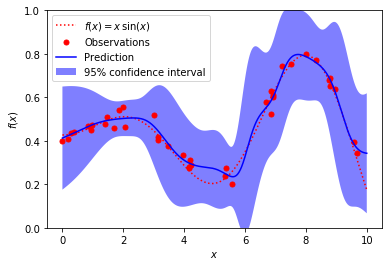

(1000, 1)


In [28]:
qmr2 = models.QMRegressorSGD(input_dim=1, dim_x=dim_x, num_eig=15, dim_y=dim_y, gamma=1, random_state=1)
qmr2.layers[0].trainable = False
eig_vals = qmr2.set_rho(qmr.get_rho())
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

def loss(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) +  0.05 * y_pred[:, 1:2]

qmr2.compile(optimizer, loss=loss)
qmr2.fit(X, y1, epochs=20)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
out = qmr2.predict(x.reshape((-1, 1)))
y_pred, sigma = out[:, 0], np.sqrt(out[:, 1])
plt.figure()
plt.plot(x, scaler.transform(f(x)), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X.ravel(), y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill_between(x[:,0], y_pred - 1.9600 * sigma, y_pred + 1.9600 * sigma,
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0, 1)
plt.legend(loc='upper left')

plt.show()
print(x.shape)